## Machine Learning Project - Fashion-MNIST
           
## BERKE FURKAN KÜSMENOĞLU - 2041496


In [1]:
import numpy as np
from urllib.request import urlopen

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) # besides loadng 
                                                                                            #the data, I already flatten it into a vector
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test


In [2]:
X_train, Y_train, X_test, Y_test = load_fashion_mnist() # you can use this function (copying the whole box) in your code to easily load the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(60000, 784) (60000,) (10000, 784) (10000,)


## Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.utils import to_categorical 
from keras.utils.vis_utils import plot_model
from tensorflow.python.framework.random_seed import set_random_seed
from sklearn.preprocessing import StandardScaler
from keras.layers import Flatten,Dense
from sklearn.model_selection import train_test_split

## Viewing Our Dimensions and Data




In [4]:
print('Train: ', X_train.shape, Y_train.shape)
print('Test: ', X_test.shape, Y_test.shape)

Train:  (60000, 784) (60000,)
Test:  (10000, 784) (10000,)


<function matplotlib.pyplot.show>

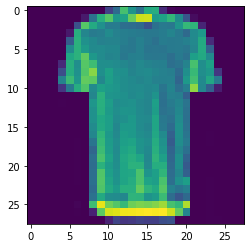

In [5]:
image= X_train[789, :].reshape((28,28))
plt.imshow(image)
plt.show

## Processing Our Data

In [6]:
#seed
np.random.seed(123)
set_random_seed(2)


In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, shuffle=False
)

## Normalization

In [8]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## Categorization

In [9]:
labels = set(Y_train)
feature_vector_length = X_train.shape[1] #number  features
num_classes = len(labels) #number of classes


y_train_cat = to_categorical(Y_train, num_classes)
y_test_cat = to_categorical(Y_test, num_classes)

## Creating The Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(input_dim=feature_vector_length, units=feature_vector_length, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy']) 
  

#train our model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=16, verbose=1, validation_split=0.2)

#see how the model looks like
print(model.summary())

Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 0.5389 - accuracy: 0.8102 - val_loss: 0.3942 - val_accuracy: 0.8629
Epoch 2/10
300/300 [==============================] - 3s 11ms/step - loss: 0.3832 - accuracy: 0.8603 - val_loss: 0.3621 - val_accuracy: 0.8700
Epoch 3/10
300/300 [==============================] - 3s 11ms/step - loss: 0.3370 - accuracy: 0.8750 - val_loss: 0.3500 - val_accuracy: 0.8743
Epoch 4/10
300/300 [==============================] - 3s 11ms/step - loss: 0.3094 - accuracy: 0.8848 - val_loss: 0.3322 - val_accuracy: 0.8808
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2955 - accuracy: 0.8884 - val_loss: 0.3217 - val_accuracy: 0.8813
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2788 - accuracy: 0.8944 - val_loss: 0.3178 - val_accuracy: 0.8878
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2630 - accuracy: 0.9013 - val_loss: 0.3264 - val_accuracy: 0.8833

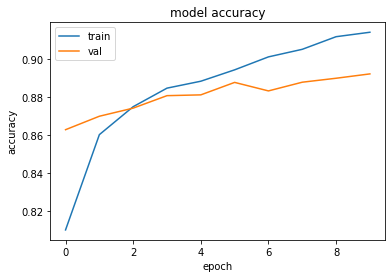

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

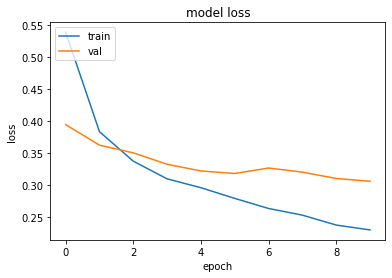

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
test_results = model.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3415 - accuracy: 0.8806
Test results - Loss: 0.3414803445339203 - Accuracy: 0.8805999755859375%


  ## Experiment on adding more layers to see the differences.





In [17]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(input_dim=feature_vector_length, units=feature_vector_length, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model_1.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy']) 
  

#train our model
history_1 = model_1.fit(X_train, y_train_cat, epochs=10, batch_size=16, verbose=1, validation_split=0.2)

#see how the model looks like
print(model.summary())

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 0.6345 - accuracy: 0.7667 - val_loss: 0.4338 - val_accuracy: 0.8470
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.4120 - accuracy: 0.8499 - val_loss: 0.3849 - val_accuracy: 0.8594
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3665 - accuracy: 0.8656 - val_loss: 0.3603 - val_accuracy: 0.8725
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3296 - accuracy: 0.8780 - val_loss: 0.3535 - val_accuracy: 0.8736
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3183 - accuracy: 0.8822 - val_loss: 0.3452 - val_accuracy: 0.8716
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2987 - accuracy: 0.8890 - val_loss: 0.3379 - val_accuracy: 0.8819
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2839 - accuracy: 0.8935 - val_loss: 0.3495 - val_accuracy: 0.8773

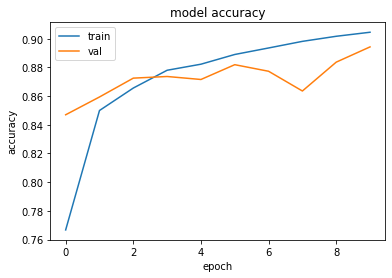

In [18]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

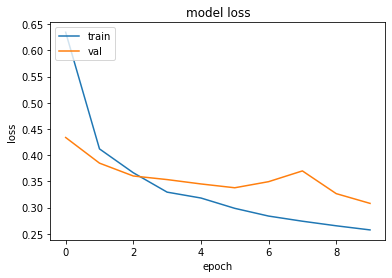

In [19]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
test_results = model_1.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8732
Test results - Loss: 0.3888019025325775 - Accuracy: 0.873199999332428%


## Experiment on increasing the nubmer of epoches of the first model and see the differences




In [19]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(input_dim=feature_vector_length, units=feature_vector_length, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model_2.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy']) 
  

#train our model
history_2 = model_2.fit(X_train, y_train_cat, epochs=50, batch_size=16, verbose=1, validation_split=0.2)

#see how the model looks like
print(model_2.summary())

Epoch 1/50
2400/2400 [==============================] - 13s 5ms/step - loss: 0.5307 - accuracy: 0.8075 - val_loss: 0.4231 - val_accuracy: 0.8491
Epoch 2/50
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3912 - accuracy: 0.8547 - val_loss: 0.3840 - val_accuracy: 0.8578
Epoch 3/50
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3518 - accuracy: 0.8701 - val_loss: 0.3546 - val_accuracy: 0.8770
Epoch 4/50
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3253 - accuracy: 0.8810 - val_loss: 0.3466 - val_accuracy: 0.8764
Epoch 5/50
2400/2400 [==============================] - 12s 5ms/step - loss: 0.3010 - accuracy: 0.8874 - val_loss: 0.3498 - val_accuracy: 0.8808
Epoch 6/50
2400/2400 [==============================] - 12s 5ms/step - loss: 0.2900 - accuracy: 0.8930 - val_loss: 0.3431 - val_accuracy: 0.8841
Epoch 7/50
2400/2400 [==============================] - 12s 5ms/step - loss: 0.2775 - accuracy: 0.8959 - val_loss: 0.3275 - val_ac

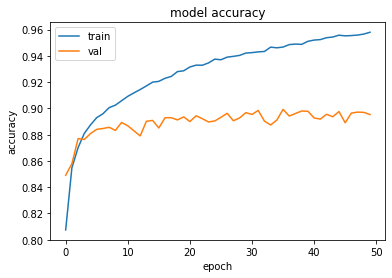

In [20]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

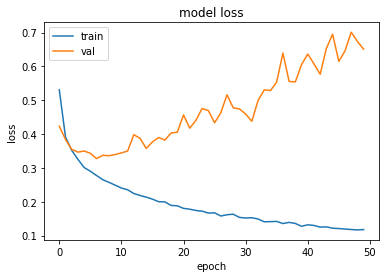

In [21]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
test_results = model_2.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.7401 - accuracy: 0.8863
Test results - Loss: 0.7400808334350586 - Accuracy: 0.8863000273704529%


## Experiment on increasing the batch size

In [23]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(input_dim=feature_vector_length, units=feature_vector_length, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model_3.compile(loss='categorical_crossentropy', 
              optimizer='adam',  
              metrics=['accuracy']) 
  

#train our model
history_3 = model_3.fit(X_train, y_train_cat, epochs=10, batch_size=128, verbose=1, validation_split=0.2)

#see how the model looks like
print(model_3.summary())

Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 0.5409 - accuracy: 0.8061 - val_loss: 0.4044 - val_accuracy: 0.8581
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.3847 - accuracy: 0.8595 - val_loss: 0.3644 - val_accuracy: 0.8707
Epoch 3/10
300/300 [==============================] - 4s 12ms/step - loss: 0.3398 - accuracy: 0.8748 - val_loss: 0.3415 - val_accuracy: 0.8769
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 0.3119 - accuracy: 0.8835 - val_loss: 0.3256 - val_accuracy: 0.8809
Epoch 5/10
300/300 [==============================] - 4s 12ms/step - loss: 0.2979 - accuracy: 0.8887 - val_loss: 0.3282 - val_accuracy: 0.8782
Epoch 6/10
300/300 [==============================] - 4s 12ms/step - loss: 0.2813 - accuracy: 0.8949 - val_loss: 0.3158 - val_accuracy: 0.8879
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.2647 - accuracy: 0.9014 - val_loss: 0.3203 - val_accuracy: 0.8850

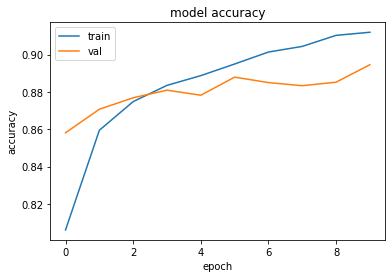

In [24]:
# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

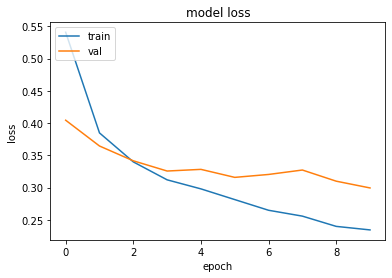

In [25]:
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
test_results = model_3.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8820
Test results - Loss: 0.3373786509037018 - Accuracy: 0.8820000290870667%


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from keras.layers import Conv2D, MaxPool2D
from sklearn import metrics




**DECISION TREE**

In [22]:
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=1234)
decision_tree.fit(X_train, Y_train)
y_val_pred = decision_tree.predict(X_test)


In [23]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_val_pred))

Accuracy: 0.8052


**RANDOM FOREST**

In [24]:
random_forest=RandomForestClassifier(n_estimators=100,max_depth=50)
random_forest.fit(X_train,Y_train)
y_pred_1=random_forest.predict(X_test)


In [25]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_1))

Accuracy: 0.8724


**-LOGISTIG REGRESSION-**

In [26]:
logistic_reg = LogisticRegression(C=100,solver='sag', tol= 0.1, multi_class='auto', max_iter=100 )
logistic_reg.fit(X_train,Y_train)
y_pred_2=logistic_reg.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_2))


Accuracy: 0.8432


**KNeighborsClassifier**

In [140]:
KNN_model = KNeighborsClassifier(weights='distance',n_neighbors=5, p=2).fit(X_train, Y_train)
y_pred_3= KNN_model.predict(X_test)

In [141]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_3))


Accuracy: 0.8527


**SVC**

In [142]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [147]:
svcclassifier = SVC(C=1,kernel='linear')
svcclassifier.fit(X_train,Y_train)
Y_pred3 = svcclassifier.predict(X_test)

In [148]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred3))

Accuracy: 0.8258
